

Лабораторная работа № 6

Кластеризация (DBSCAN, OPTICS)

Выполнил: Королёв Фёдор Олегович, ПИ15


**1. Загрузка данных**

1.1. Скачать датасет по ссылке https://www.kaggle.com/datasets/muratkokludataset/pistachio-dataset

1.2. Загрузить данные из Pistachio_16_Features_Dataset в датафрейм. Подготовить данные для обработки (при необходимости - убрать столбец с метками, классом (если есть) и, если в наборе данных присутствуют пропуски, исключить наблюдения с пропущенными значениями и т.д.)

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd

# Загружаем данные из файла Pistachio_16_Features_Dataset.xlsx
path = 'Pistachio_16_Features_Dataset.xlsx'

# Читаем файл Excel в датафрейм
data = pd.read_excel(path)

# Выводим первые несколько строк датафрейма для проверки
print(data)

# Удаляем последний столбец, тк он содержит класс)
data = data.iloc[:, :-1]

# Проверяем наличие пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(data.isnull().sum())

# Удаляем строки с пропущенными значениями
data = data.dropna()

print(data)


        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0      63391  1568.4050    390.3396    236.7461        0.7951  284.0984   
1      68358  1942.1870    410.8594    234.7525        0.8207  295.0188   
2      73589  1246.5380    452.3630    220.5547        0.8731  306.0987   
3      71106  1445.2610    429.5291    216.0765        0.8643  300.8903   
4      80087  1251.5240    469.3783    220.9344        0.8823  319.3273   
...      ...        ...         ...         ...           ...       ...   
2143   85983  1157.1160    444.3447    248.8627        0.8284  330.8730   
2144   85691  2327.3459    439.8794    278.9297        0.7732  330.3107   
2145  101136  1255.6190    475.2161    271.3299        0.8210  358.8459   
2146   97409  1195.2150    452.1823    274.5764        0.7945  352.1718   
2147   78466  2356.9080    445.9131    258.5125        0.8148  316.0791   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0       0.8665        

1.3. Понизить размерность пространства данных до 2, определить величину дисперсии, которую объясняют две компоненты. Выполнить кластеризацию методом k-средних для трех кластеров, подобрать оптимальное значение n_init . Вывести на экран получившееся разделение данных на кластеры.

In [2]:
from sklearn.preprocessing import StandardScaler

# Стандартизируем данные
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# Преобразуем стандартизированные данные обратно в датафрейм для удобства
scaled_data = pd.DataFrame(scaled_features, columns=data.columns)

print("\nСтандартизированные данные:")
print(scaled_data)


Стандартизированные данные:
          AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    -1.262296   0.379338   -1.723590   -0.051668     -0.925560 -1.257169   
1    -0.883675   1.374821   -1.090999   -0.117456     -0.400406 -0.851241   
2    -0.484931  -0.477881    0.188485   -0.585974      0.674518 -0.439385   
3    -0.674203   0.051373   -0.515445   -0.733752      0.493996 -0.632989   
4     0.010393  -0.464602    0.713037   -0.573444      0.863245  0.052342   
...        ...        ...         ...         ...           ...       ...   
2143  0.459829  -0.716036   -0.058705    0.348171     -0.242450  0.481513   
2144  0.437570   2.400604   -0.196363    1.340362     -1.374813  0.460612   
2145  1.614899  -0.453696    0.893007    1.089574     -0.394252  1.521308   
2146  1.330800  -0.614568    0.182914    1.196706     -0.937869  1.273221   
2147 -0.113171   2.479336   -0.010354    0.666608     -0.521438 -0.068398   

      SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_


Величина дисперсии, объясняемая двумя компонентами:
[0.4498096  0.30577581]
Общая объясненная дисперсия: 0.76
n_init: 1, Инерция: 11666.925864663503
n_init: 2, Инерция: 11666.925864663504
n_init: 3, Инерция: 11666.9258646635
n_init: 4, Инерция: 11666.925864663504
n_init: 5, Инерция: 11666.9258646635
n_init: 6, Инерция: 11666.925864663503
n_init: 7, Инерция: 11666.925864663504
n_init: 8, Инерция: 11666.925864663503
n_init: 9, Инерция: 11666.925864663503
n_init: 10, Инерция: 11666.925864663503
n_init: 11, Инерция: 11666.925864663504
n_init: 12, Инерция: 11666.925864663503
n_init: 13, Инерция: 11666.9258646635
n_init: 14, Инерция: 11666.925864663503
n_init: 15, Инерция: 11666.925864663504
n_init: 16, Инерция: 11666.321778583035
n_init: 17, Инерция: 11666.321778583035
n_init: 18, Инерция: 11666.321778583035
n_init: 19, Инерция: 11666.321778583033
n_init: 20, Инерция: 11666.321778583035


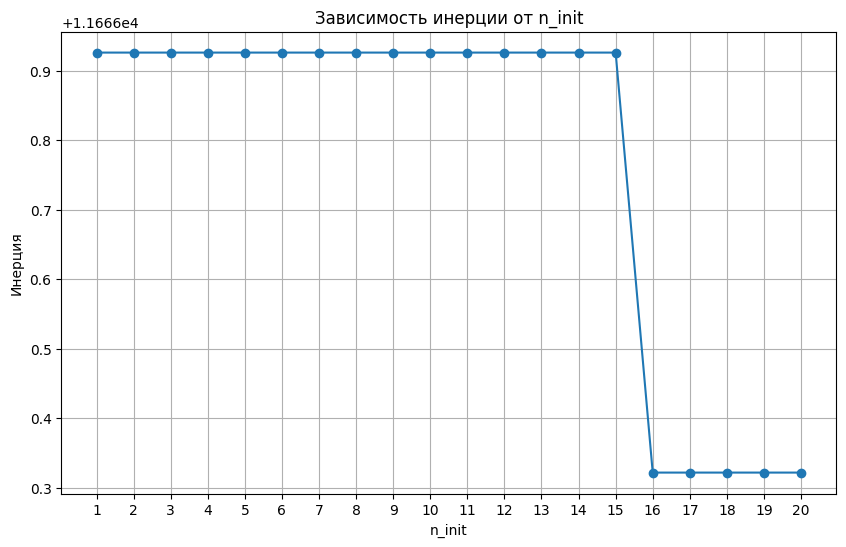


Оптимальное значение n_init: 19


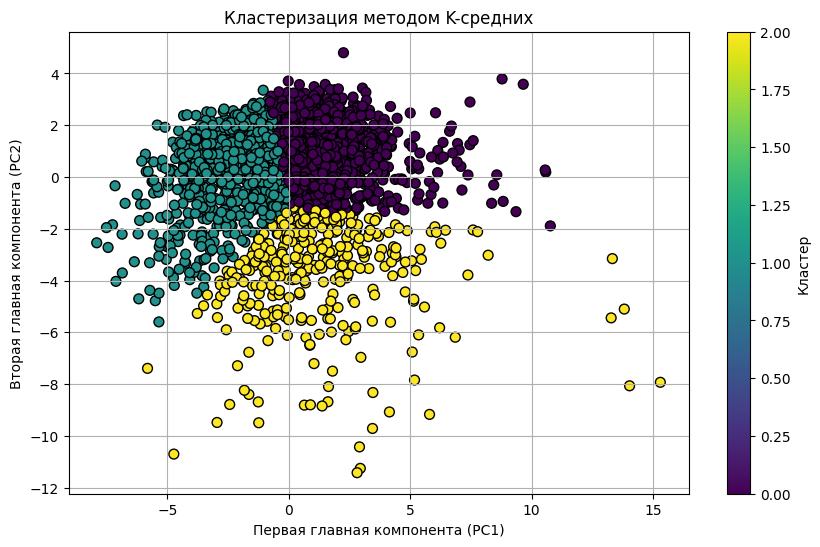

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Понижаем размерность до 2 с помощью PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Создаем датафрейм для двух компонент PCA
pca_data = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Определяем величину дисперсии, объясняемую двумя компонентами
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()

print("\nВеличина дисперсии, объясняемая двумя компонентами:")
print(explained_variance)
print(f"Общая объясненная дисперсия: {total_explained_variance:.2f}")

# Выполняем кластеризацию методом k-средних для n_init от 1 до 20
n_init_values = list(range(1, 21))
inertia_values = []

for n_init in n_init_values:
    kmeans = KMeans(n_clusters=3, n_init=n_init, random_state=42)
    kmeans.fit(pca_data)
    inertia_values.append(kmeans.inertia_)

# Выводим значения инерции для разных n_init
for n_init, inertia in zip(n_init_values, inertia_values):
    print(f'n_init: {n_init}, Инерция: {inertia}')

# Визуализируем график инерции
plt.figure(figsize=(10, 6))
plt.plot(n_init_values, inertia_values, marker='o')
plt.title('Зависимость инерции от n_init')
plt.xlabel('n_init')
plt.ylabel('Инерция')
plt.xticks(n_init_values)  # Устанавливаем метки по оси X для каждого значения n_init
plt.grid()
plt.show()

# Выбираем лучшее значение n_init (например, наименьшая инерция)
optimal_n_init = n_init_values[inertia_values.index(min(inertia_values))]
print(f"\nОптимальное значение n_init: {optimal_n_init}")

# Выполняем кластеризацию с оптимальным n_init
kmeans_optimal = KMeans(n_clusters=3, n_init=optimal_n_init, random_state=42)
clusters = kmeans_optimal.fit_predict(pca_data)

# Добавляем информацию о кластерах в датафрейм PCA
pca_data['Cluster'] = clusters

# Визуализируем результаты кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Кластеризация методом K-средних')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(label='Кластер')
plt.grid()
plt.show()

**2. DBSCAN**

2.1. Изучить теоретические сведения о кластеризации DBSCAN

2.2. Ответить на вопрос: Необходима ли стандартизация данных?
Обосновать свой ответ.

Так как DBSCAN использует расстояния между точками для определения кластеров, а датасет Pistachio_16_Features_Dataset, имеет разный масштаб среди данных, что может повлиять на результаты кластеризации. Поэтому еще до кластеризации KMeans была проведена стандартизация данных

2.3. Провести кластеризацию методом DBSCAN с параметрами по умолчанию. Вывести
метки кластеров, количество кластеров, а также процент наблюдений, которые
кластеризовать не удалось.


Метки кластеров:
[-1 -1 -1 ...  5 -1 -1]

Количество кластеров: 17
Количество наблюдений, которые не удалось кластеризовать: 1937
Процент наблюдений, которые не удалось кластеризовать: 90.18%


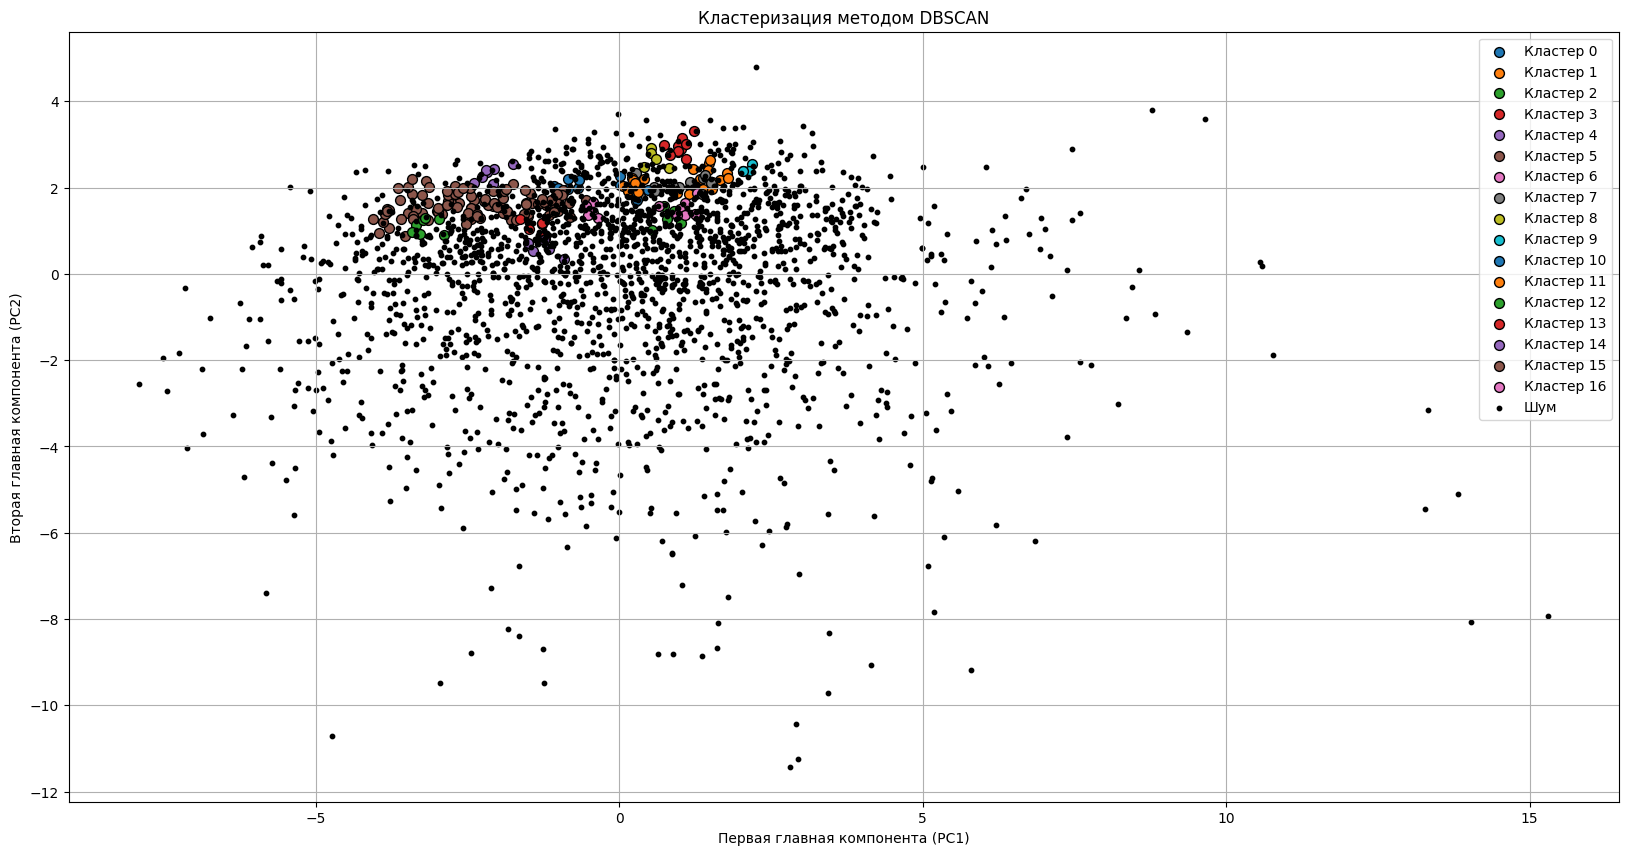

In [4]:
# Импортируем необходимые библиотеки
from sklearn.cluster import DBSCAN

# Выполняем кластеризацию методом DBSCAN с параметрами по умолчанию
dbscan = DBSCAN()
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Выводим метки кластеров
print("\nМетки кластеров:")
print(clusters_dbscan)

# Определяем количество кластеров
# -1 обозначает шум (не удалось кластеризовать)
n_clusters = len(set(clusters_dbscan)) - (1 if -1 in clusters_dbscan else 0)
print(f"\nКоличество кластеров: {n_clusters}")

# Определяем количество наблюдений, которые не удалось кластеризовать (шум)
n_noise = list(clusters_dbscan).count(-1)
print(f"Количество наблюдений, которые не удалось кластеризовать: {n_noise}")

# Вычисляем процент наблюдений, которые не удалось кластеризовать
percentage_noise = (n_noise / len(scaled_data)) * 100
print(f"Процент наблюдений, которые не удалось кластеризовать: {percentage_noise:.2f}%")

# Визуализируем результаты кластеризации
plt.figure(figsize=(20, 10))

# Отображаем кластеры (исключая шум)
unique_clusters = set(clusters_dbscan) - {-1}
for cluster in unique_clusters:
    cluster_mask = clusters_dbscan == cluster
    plt.scatter(
        pca_data[cluster_mask].iloc[:, 0],  # Используем первый столбец pca_data
        pca_data[cluster_mask].iloc[:, 1],  # Используем второй столбец pca_data
        label=f'Кластер {cluster}',
        s=50,
        edgecolor='k'
    )

# Отображаем точки шума
noise_mask = clusters_dbscan == -1
plt.scatter(
    pca_data[noise_mask].iloc[:, 0],  # Используем первый столбец для точек шума
    pca_data[noise_mask].iloc[:, 1],  # Используем второй столбец для точек шума
    c='black',
    label='Шум',
    s=10,
    edgecolor='k'
)

plt.title('Кластеризация методом DBSCAN')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.legend()
plt.grid()
plt.show()

Что означает каждый из параметров (и его значение) в функции DBSCAN?

DBSCAN имеет следующие параметры:

1. eps

Тип - float, значение по умолчанию = 0.5

Данный параметр определяет радиус окрестности вокруг точки. Если расстояние между двумя точками <= значению eps, то эти точки - соседи. Параметр нужно подбирать для каждого случая индивидуально: если eps слишком маленькое то разбросанные точки могут классифицированы как шум, если слишком большое, то метод может объединить разные плотные кластеры в один.

2. Min_samples

Тип - int, значение по умолчанию = 5

Минимальное количество соседних точек, необходимых для того, чтобы точка считалась "ядром" кластера. Если в пределах eps от точки находится не менее, чем min_samples точек, то данная точка будет ядром кластера. Если точка не является ядром, но находится в пределах eps от ядра, она считается "пограничной". В противном случае, такая точка считается шумом.

3. metric

Тип - str или callable, значение по умолчанию = euclidean

Метрика для вычисления расстояния между точками. По умолчанию используется евклидово расстояние, но можно задать другие метрики, такие как "манхэттенское" или "косинусное" расстояние.

4. algorithm

Тип - str, значение по умолчанию = auto

Алгоритм, используемый для вычисления ближайших соседей. Помимо auto, который позволяет алгоритму выбрать наиболее подходящий метод в зависимости от данных, можно установить вручную следующие алгоритмы: 'ball_tree', 'kd_tree' и 'brute'.

5. leaf_size

Тип - int, значение по умолчанию = 30

Размер листа в структуре данных для 'ball_tree' и 'kd_tree'. Этот параметр может влиять на скорость выполнения алгоритма и использование памяти (большие значения будут выдавать более точные результаты, но использовать больше памяти).

6. p

Тип - float, значение по умолчанию = 2

Параметр, определяющий метрику вычисления расстояния. Значение по умолчанию 2 соответствует евклидовой метрике, а 1 - Махаланобиса.

7. n_jobs

Тип - float, значение по умолчанию = 2

Количество потоков для параллельной обработки. Если установитб n_jobs=-1, будут использоваться все доступные ядра процессора для ускорения вычислений.

2.4. Постройте график количества кластеров и процента не кластеризованных наблюдений в зависимости от максимальной рассматриваемой дистанции между наблюдениями. Минимальное значение количества точек образующих, кластер оставить по умолчанию.

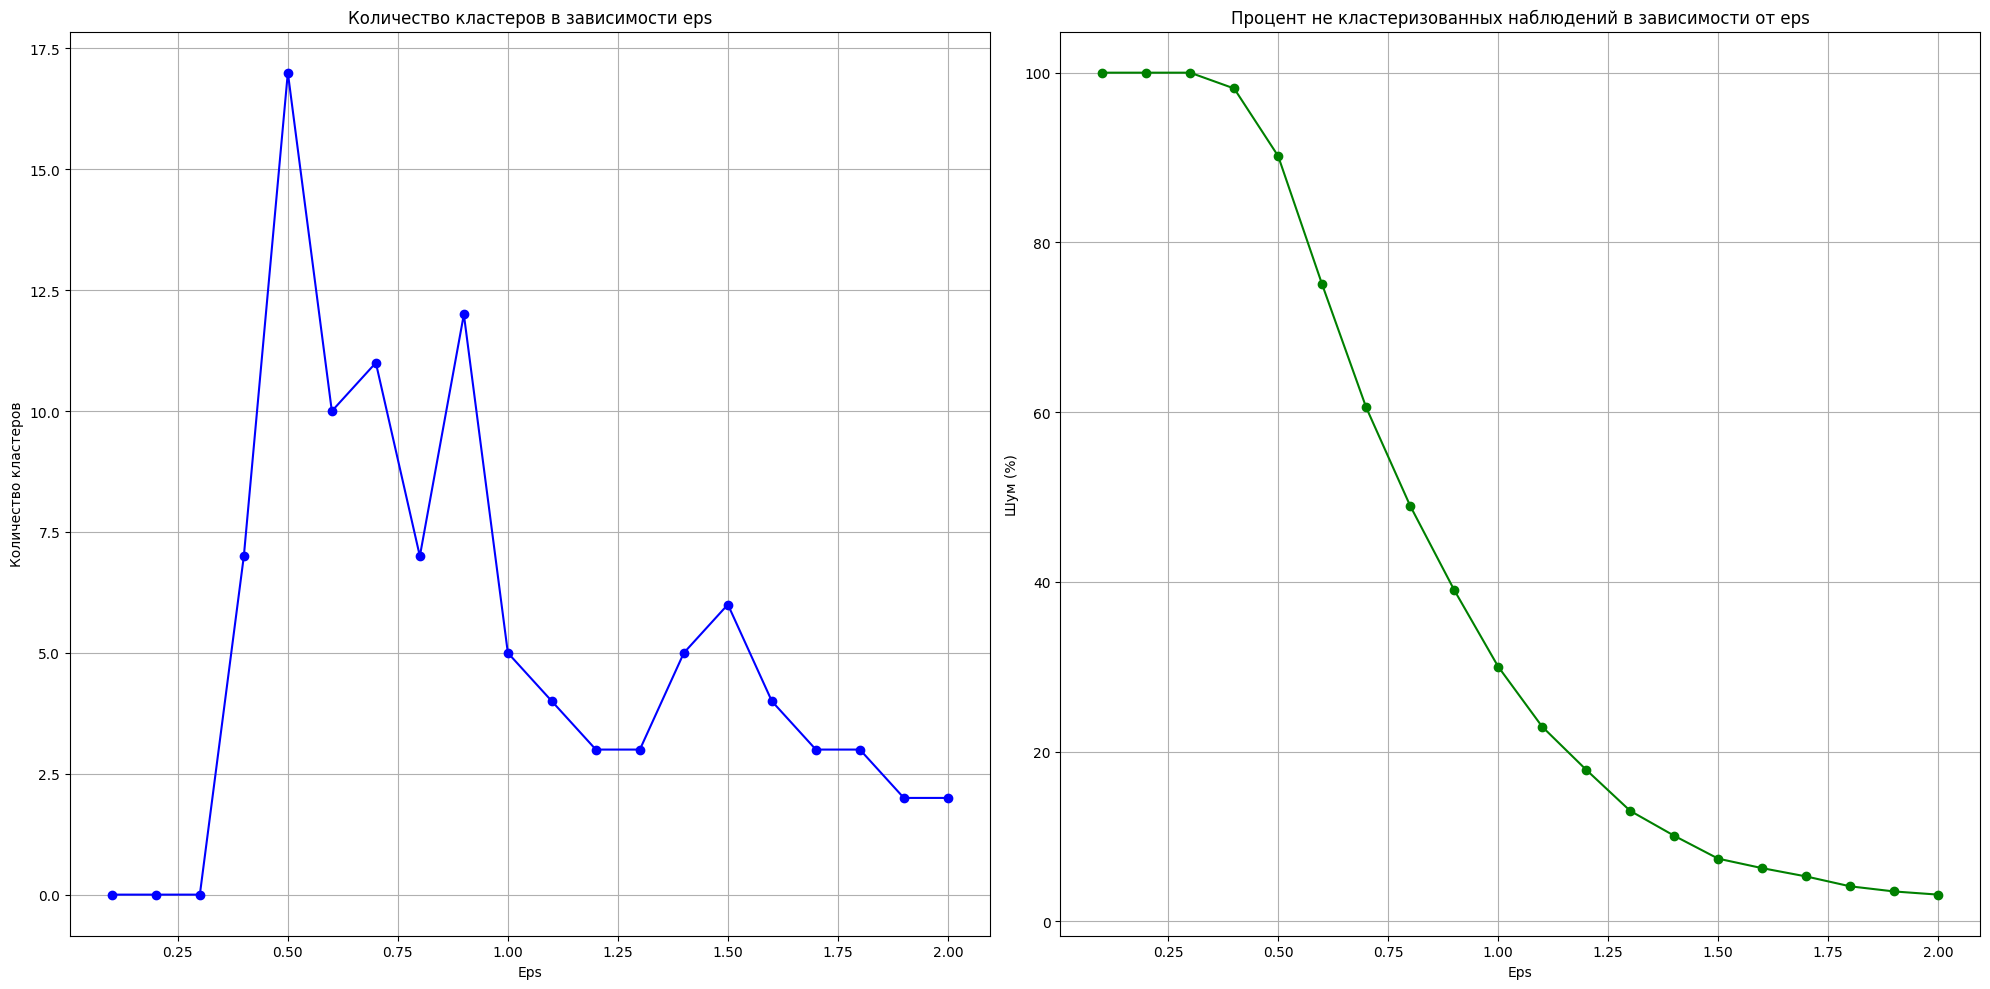

In [5]:
import numpy as np

# Задаем диапазон значений для eps
eps_values = np.arange(0.1, 2.1, 0.1)  # Значения от 0.1 до 2.0 с шагом 0.1
n_clusters_list = []  # Список для хранения количества кластеров
percentage_noise_list = []  # Список для хранения процента шума

# Проходим по каждому значению eps и выполняем кластеризацию DBSCAN
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)  # Создаем объект DBSCAN с текущим значением eps
    labels = dbscan.fit_predict(scaled_data)  # Применяем кластеризацию

    # Получаем количество кластеров и количество шумовых точек
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 обозначает шумовые точки
    n_noise = list(labels).count(-1)  # Количество шумовых точек

    # Процент наблюдений, которые не удалось кластеризовать
    percentage_noise = n_noise / len(labels) * 100

    # Сохраняем результаты в списки
    n_clusters_list.append(n_clusters)
    percentage_noise_list.append(percentage_noise)

# Визуализация результатов
plt.figure(figsize=(20, 10))

# Создаем два графика на одном изображении: количество кластеров и процент шума
plt.subplot(1, 2, 1)
plt.plot(eps_values, n_clusters_list, marker='o', color='b')
plt.title('Количество кластеров в зависимости eps')
plt.xlabel('Eps')
plt.ylabel('Количество кластеров')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(eps_values, percentage_noise_list, marker='o', color='g')
plt.title('Процент не кластеризованных наблюдений в зависимости от eps')
plt.xlabel('Eps')
plt.ylabel('Шум (%)')
plt.grid()

# Показываем графики
plt.tight_layout()  # Автоматически подстраивает подложку для лучшего отображения
plt.show()

2.5. Постройте график количества кластеров и процента не кластеризованных наблюдений в зависимости от минимального значения количества точек, образующих кластер. Максимальную рассматриваемую дистанцию между наблюдениями оставьте по умолчанию

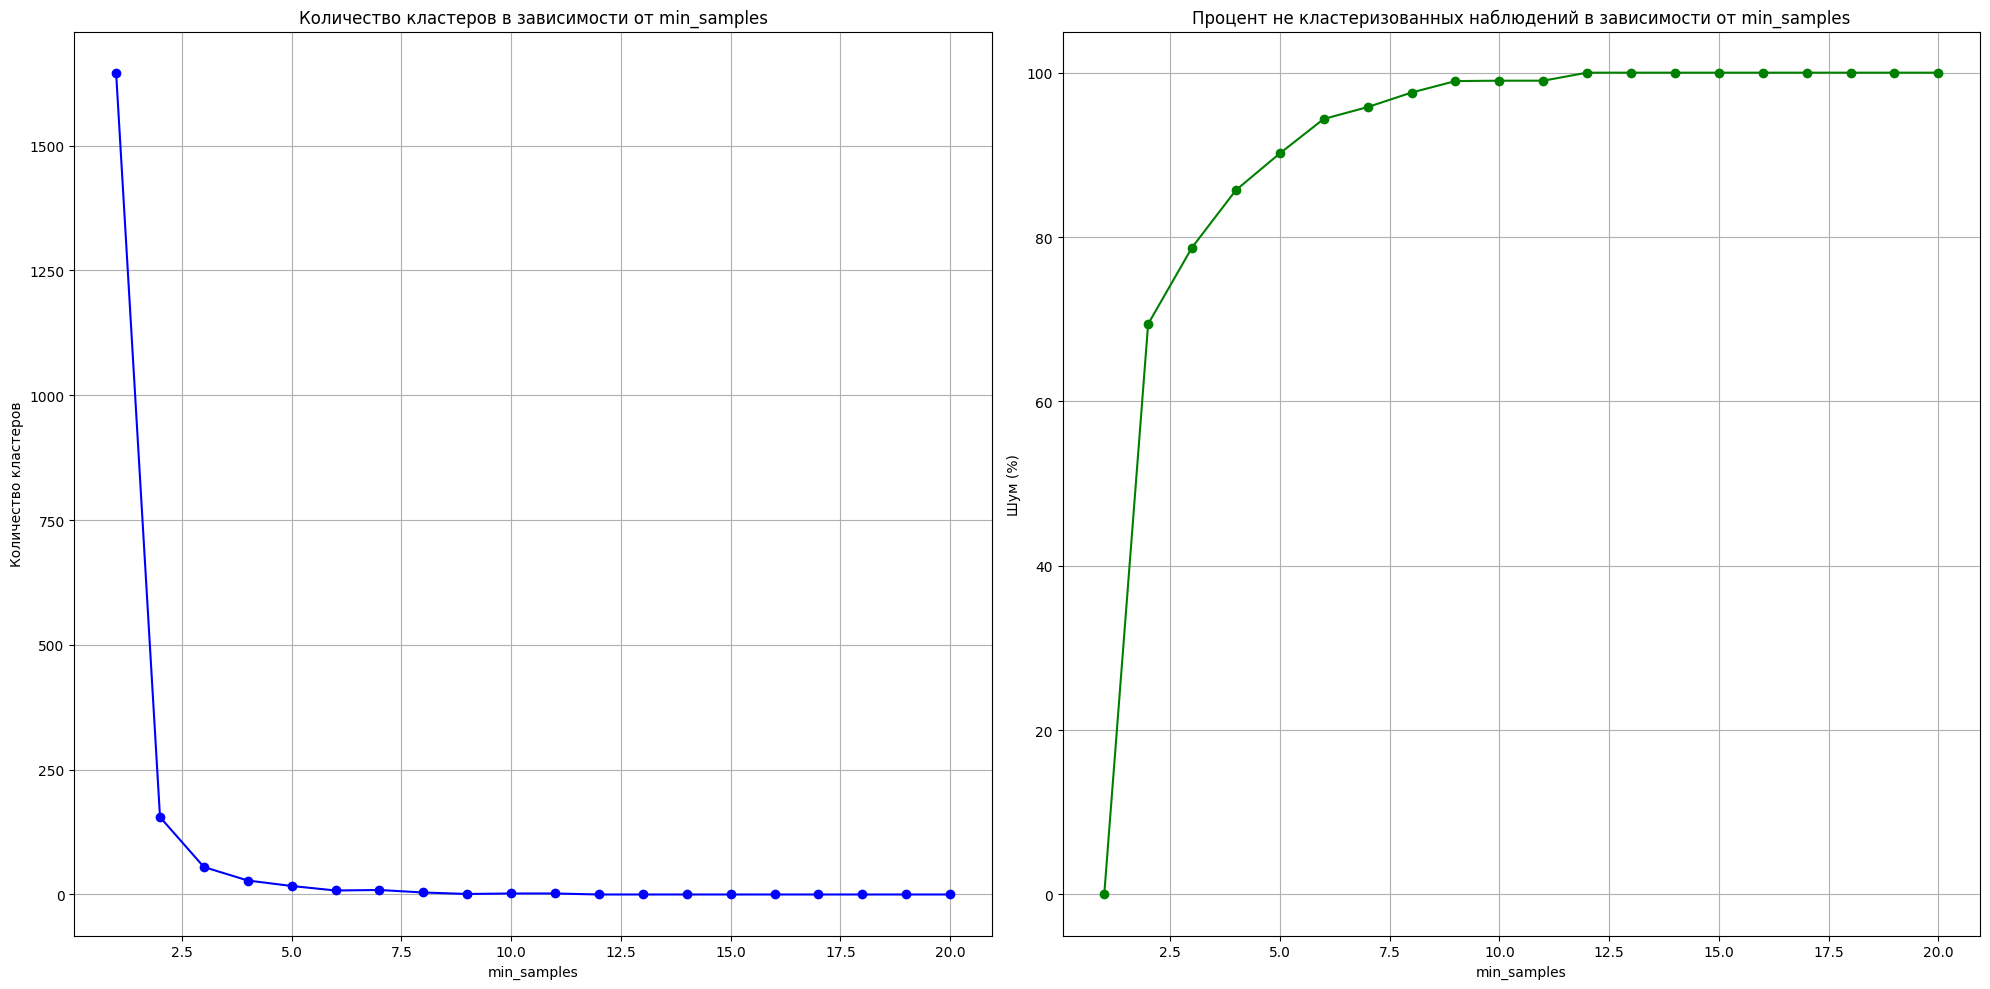

In [6]:
# Задаем диапазон значений для min_samples
min_samples_values = range(1, 21)  # Значения от 1 до 20
n_clusters_list = []  # Список для хранения количества кластеров
percentage_noise_list = []  # Список для хранения процента шума

# Проходим по каждому значению min_samples и выполняем кластеризацию DBSCAN
for min_samples in min_samples_values:
    dbscan = DBSCAN(min_samples=min_samples)  # Создаем объект DBSCAN с текущим значением min_samples
    labels = dbscan.fit_predict(scaled_data)  # Применяем кластеризацию

    # Получаем количество кластеров и количество шумовых точек
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 обозначает шумовые точки
    n_noise = list(labels).count(-1)  # Количество шумовых точек

    # Процент наблюдений, которые не удалось кластеризовать
    percentage_noise = n_noise / len(labels) * 100

    # Сохраняем результаты в списки
    n_clusters_list.append(n_clusters)
    percentage_noise_list.append(percentage_noise)

# Визуализация результатов
plt.figure(figsize=(20, 10))

# Создаем два графика на одном изображении: количество кластеров и процент шума
plt.subplot(1, 2, 1)
plt.plot(min_samples_values, n_clusters_list, marker='o', color='b')
plt.title('Количество кластеров в зависимости от min_samples')
plt.xlabel('min_samples')
plt.ylabel('Количество кластеров')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(min_samples_values, percentage_noise_list, marker='o', color='g')
plt.title('Процент не кластеризованных наблюдений в зависимости от min_samples')
plt.xlabel('min_samples')
plt.ylabel('Шум (%)')
plt.grid()

# Показываем графики
plt.tight_layout()  # Автоматически подстраивает подложку для лучшего отображения
plt.show()

2.6. Определите значения параметров, при котором количество кластеров получается от 5 до 7, и процент не кластеризованных наблюдений не превышает 12%.

In [7]:
# Задаем диапазоны значений для eps и min_samples
eps_values = np.arange(0.1, 2.1, 0.1)  # Значения eps от 0.1 до 2.0 с шагом 0.1
min_samples_values = range(1, 21)  # Значения min_samples от 1 до 20

# Список для хранения подходящих параметров
valid_params = []

# Проходим по каждому значению eps и min_samples и выполняем кластеризацию DBSCAN
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Создаем объект DBSCAN
        labels = dbscan.fit_predict(scaled_data)  # Применяем кластеризацию

        # Получаем количество кластеров и количество шумовых точек
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 обозначает шумовые точки
        n_noise = list(labels).count(-1)  # Количество шумовых точек

        # Процент наблюдений, которые не удалось кластеризовать
        percentage_noise = n_noise / len(labels) * 100

        # Проверяем условия для сохранения параметров
        if 5 <= n_clusters <= 7 and percentage_noise <= 12:
            valid_params.append((eps, min_samples, n_clusters, percentage_noise))

# Выводим подходящие параметры
print("Подходящие параметры (eps, min_samples, количество кластеров, процент шума):")
for params in valid_params:
    print(f"eps: {params[0]:.2f}, min_samples: {params[1]}, Количество кластеров: {params[2]}, Процент шума: {params[3]:.2f}%")

Подходящие параметры (eps, min_samples, количество кластеров, процент шума):
eps: 1.30, min_samples: 4, Количество кластеров: 7, Процент шума: 11.41%
eps: 1.40, min_samples: 4, Количество кластеров: 6, Процент шума: 8.38%
eps: 1.40, min_samples: 5, Количество кластеров: 5, Процент шума: 10.10%
eps: 1.50, min_samples: 3, Количество кластеров: 7, Процент шума: 5.59%
eps: 1.50, min_samples: 4, Количество кластеров: 6, Процент шума: 6.66%
eps: 1.50, min_samples: 5, Количество кластеров: 6, Процент шума: 7.40%
eps: 1.60, min_samples: 3, Количество кластеров: 5, Процент шума: 4.75%


2.7. Понизьте размерность данных до 2 . Визуализируйте результаты кластеризации, полученные в пункте 2.6 (метки должны быть получены на данных до уменьшения размерности).

Количество кластеров: 5
Количество не кластеризированных наблюдений: 102
Процент не кластеризированных наблюдений: 4.75%


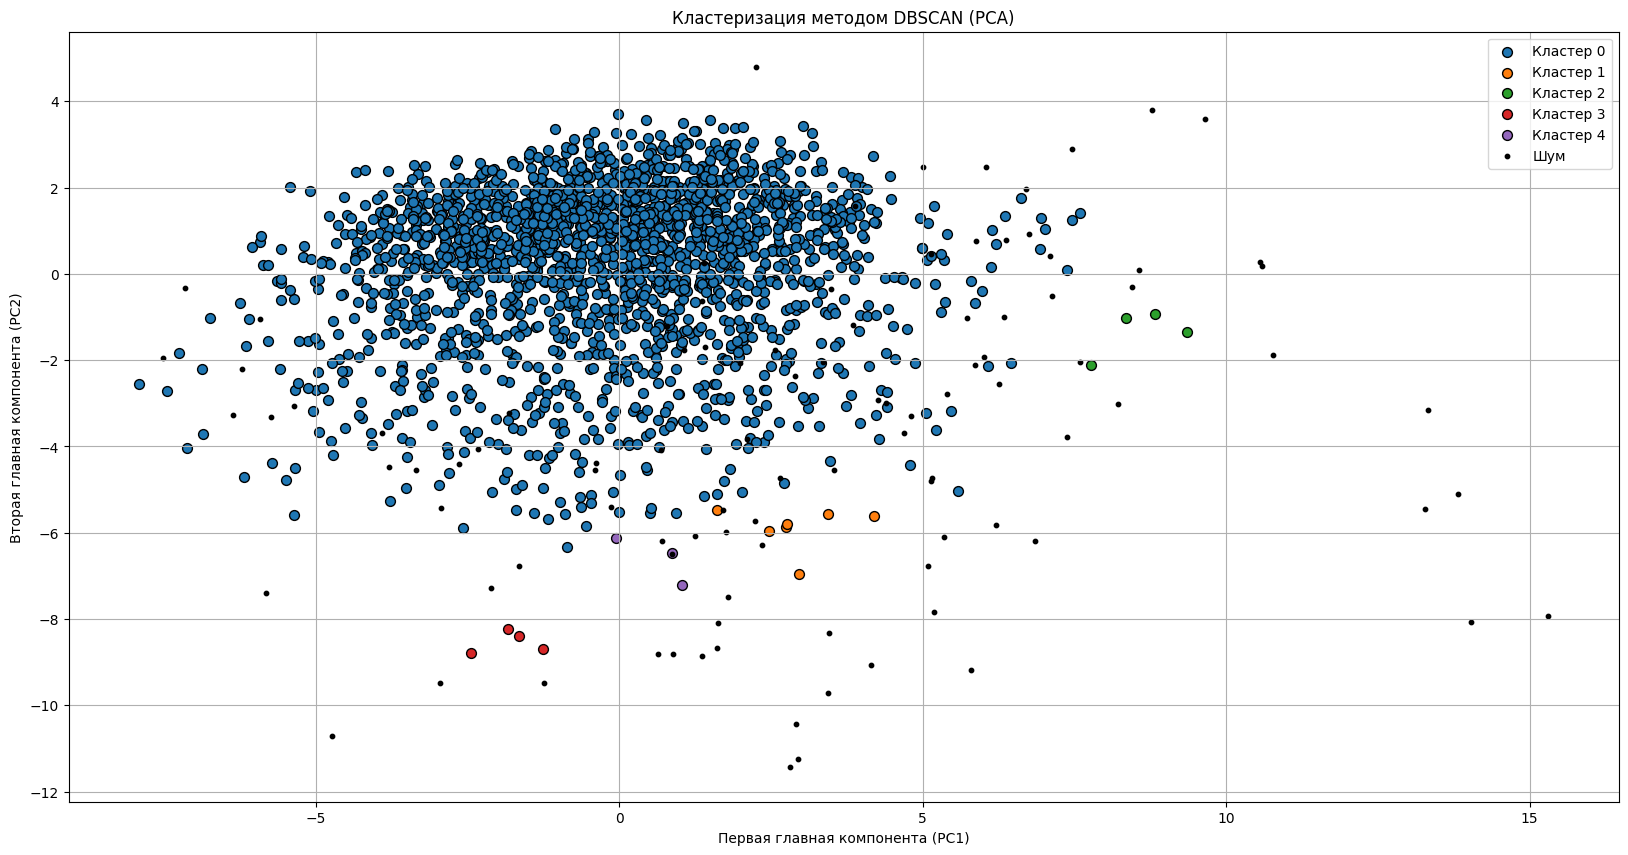

In [8]:
# Задаем параметры для DBSCAN, которые были определены в пункте 2.6
eps = 1.6  # Пример значения eps, которое удовлетворяет условиям
min_samples = 3  # Пример значения min_samples, которое удовлетворяет условиям

# Выполняем кластеризацию DBSCAN с выбранными параметрами
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(scaled_data)  # Получаем метки кластеров

# Понижаем размерность данных до 2 с помощью PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Создаем датафрейм для двух компонент PCA и добавляем метки кластеров
pca_data2 = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_data2['Cluster'] = labels

# Определяем количество кластеров и количество шумовых точек
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 обозначает шум
n_noise = list(labels).count(-1)  # Количество шумовых точек

# Вычисляем процент наблюдений, которые не удалось кластеризовать
percentage_noise = (n_noise / len(labels)) * 100

# Выводим информацию о кластерах
print(f"Количество кластеров: {n_clusters}")
print(f"Количество не кластеризированных наблюдений: {n_noise}")
print(f"Процент не кластеризированных наблюдений: {percentage_noise:.2f}%")

# Визуализируем результаты кластеризации
plt.figure(figsize=(20, 10))

# Отображаем кластеры (исключая шум)
unique_clusters = set(labels) - {-1}
for cluster in unique_clusters:
    cluster_mask = labels == cluster
    plt.scatter(
        pca_data2['PC1'][cluster_mask],
        pca_data2['PC2'][cluster_mask],
        label=f'Кластер {cluster}',
        s=50,
        edgecolor='k'
    )

# Отображаем точки шума
noise_mask = labels == -1
plt.scatter(
    pca_data2['PC1'][noise_mask],
    pca_data2['PC2'][noise_mask],
    c='black',
    label='Шум',
    s=10,
    edgecolor='k'
)

plt.title('Кластеризация методом DBSCAN (PCA)')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.legend()
plt.grid()
plt.show()

**3.OPTICS**

3.1. Изучите теоретический материал

3.2. Опишите параметры функции OPTICS, а также какими атрибутами они обладают.
Что означают значения параметров принимаемых по умолчанию?

1. X

Тип - массив, матрица, dataframe, значение по умолчанию - нет

Входные данные, которые могут быть представлены в виде матрицы (двумерного массива) или объекта, содержащего расстояния.

2. min_samples

Тип - int, значение по умолчанию - 5

Минимальное количество точек, необходимых для формирования кластера. Это значение определяет, сколько соседей должно быть у точки, чтобы она считалась "ядром" кластера

3. max_eps

Тип - float, значение по умолчанию - None (нет ограниченя расстоянию)

Максимальное расстояние для поиска соседей. Этот параметр заменяет фиксированный радиус ε из DBSCAN и позволяет алгоритму работать с различными плотностями

4. metric

Тип - str или callable, значение по умолчанию = euclidean

Метрика для вычисления расстояния между точками. По умолчанию используется евклидово расстояние, но можно задать другие метрики, такие как "манхэттенское" или "косинусное" расстояние

5. algorithm

Тип - str, значение по умолчанию = auto

Алгоритм, используемый для вычисления ближайших соседей. Помимо auto, который позволяет алгоритму выбрать наиболее подходящий метод в зависимости от данных, можно установить вручную следующие алгоритмы: 'ball_tree', 'kd_tree' и 'brute'.

6. leaf_size

Тип - int, значение по умолчанию = 30

Размер листа в структуре данных для 'ball_tree' и 'kd_tree'. Этот параметр может влиять на скорость выполнения алгоритма и использование памяти (большие значения будут выдавать более точные результаты, но использовать больше памяти).

7. p

Тип - float, значение по умолчанию = 2

Параметр, определяющий метрику вычисления расстояния. Значение по умолчанию 2 соответствует евклидовой метрике, а 1 - Махаланобиса.

8. n_jobs

Тип - float, значение по умолчанию = 2

Количество потоков для параллельной обработки. Если установитб n_jobs=-1, будут использоваться все доступные ядра процессора для ускорения вычислений.


Атрибуты, возвращаемые функцией OPTICS

1. reachability

Вектор значений достижимости для каждой точки. Эти значения представляют собой минимальное расстояние до точки, которая может быть достигнута из данной точки в процессе кластеризации.

2. ordering

Индексы точек в порядке их обработки алгоритмом OPTICS. Это упорядоченный список всех точек в данных.

3. cluster

Вектор меток кластеров для каждой точки. Значения равны номеру кластера или -1 для шумовых точек.

4. core_distances

Вектор расстояний до ближайших соседей для каждой точки, которые являются "ядрами" кластеров.

5. n_clusters

Общее количество кластеров, обнаруженных алгоритмом OPTICS (исключая шумовые точки).


3.3. Найдите такие параметры max_eps и min_samples функции OPTICS, при которых получаются трезультаты близкие к результатам DBSCAN из пункта 2.6. Вывести результаты на экран.

Параметры DBSCAN:
eps: 1.6, min_samples: 3
Количество кластеров: 5
Процент не кластеризованных: 4.75%
Rand index: 1.0000

Параметры OPTICS:
max_eps: 2.12, min_samples: 15
Количество кластеров: 1
Процент не кластеризованных: 4.61%
Rand index: 0.7650


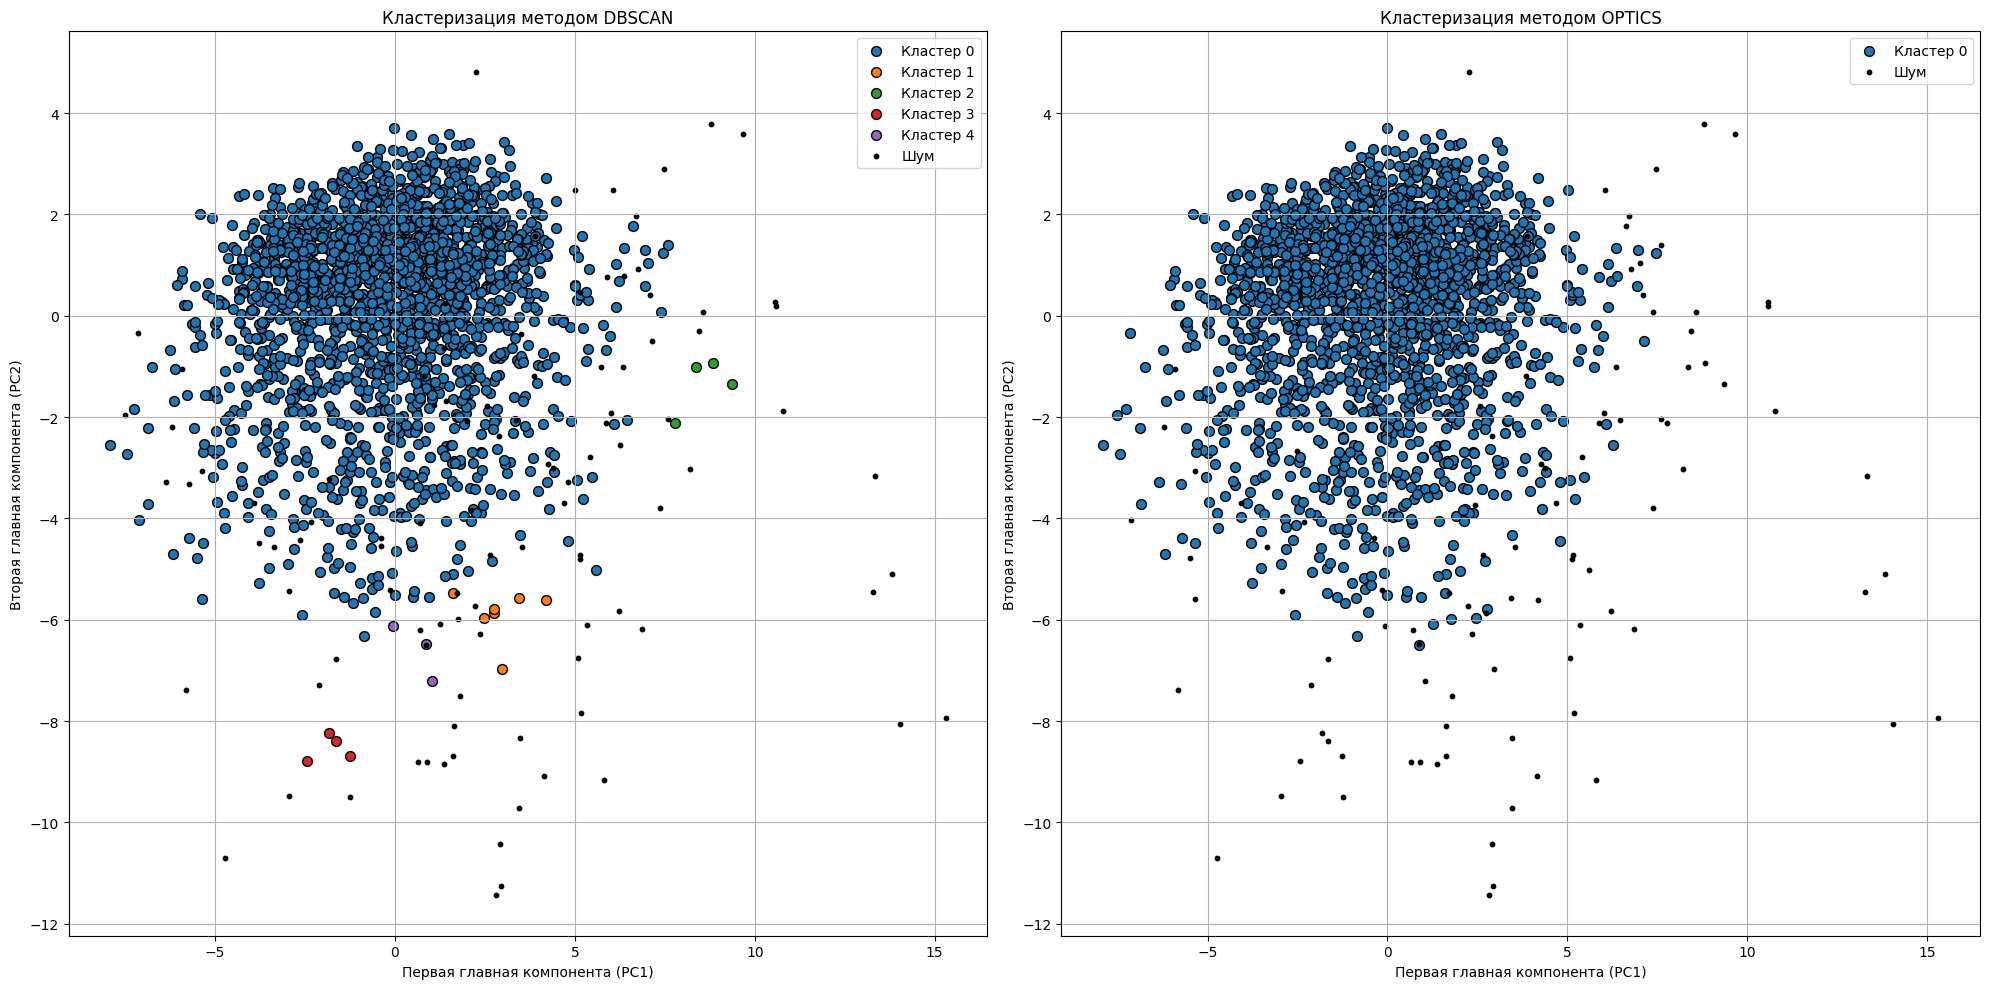

In [9]:
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
import matplotlib.pyplot as plt

# Задаем параметры для DBSCAN
dbscan_eps = 1.6  # Параметр eps для DBSCAN
dbscan_min_samples = 3  # Параметр min_samples для DBSCAN

# Выполняем кластеризацию DBSCAN с выбранными параметрами
dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
dbscan_labels = dbscan.fit_predict(scaled_data)  # Получаем метки кластеров

# Определяем количество кластеров и количество шумовых точек для DBSCAN
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # -1 обозначает шум
n_noise_dbscan = list(dbscan_labels).count(-1)  # Количество шумовых точек

# Вычисляем процент наблюдений, которые не удалось кластеризовать
percentage_noise_dbscan = (n_noise_dbscan / len(dbscan_labels)) * 100

# Устанавливаем параметры для OPTICS
optics_max_eps = 2.12  # Примерное значение max_eps для OPTICS
optics_min_samples = 15  # min_samples для OPTICS

# Кластеризация OPTICS
optics = OPTICS(max_eps=optics_max_eps, min_samples=optics_min_samples)
optics_labels = optics.fit_predict(scaled_data)

# Определяем количество кластеров и количество шумовых точек для OPTICS
n_clusters_optics = len(set(optics_labels)) - (1 if -1 in optics_labels else 0)  # -1 обозначает шум
n_noise_optics = list(optics_labels).count(-1)  # Количество шумовых точек

# Вычисляем процент наблюдений, которые не удалось кластеризовать
percentage_noise_optics = (n_noise_optics / len(optics_labels)) * 100



# Rand index для DBSCAN
rand_index_dbscan = metrics.adjusted_rand_score(dbscan_labels, dbscan_labels)

# Rand index для OPTICS
rand_index_optics = metrics.adjusted_rand_score(dbscan_labels, optics_labels)



# Вывод результатов на экран для DBSCAN
print(f"Параметры DBSCAN:")
print(f"eps: {dbscan_eps}, min_samples: {dbscan_min_samples}")
print(f"Количество кластеров: {n_clusters_dbscan}")
print(f"Процент не кластеризованных: {percentage_noise_dbscan:.2f}%")
print(f"Rand index: {rand_index_dbscan:.4f}")

print()

# Вывод результатов на экран для OPTICS
print(f"Параметры OPTICS:")
print(f"max_eps: {optics_max_eps}, min_samples: {optics_min_samples}")
print(f"Количество кластеров: {n_clusters_optics}")
print(f"Процент не кластеризованных: {percentage_noise_optics:.2f}%")
print(f"Rand index: {rand_index_optics:.4f}")



# Визуализация результатов кластеризации DBSCAN
plt.figure(figsize=(20, 10))

# График DBSCAN
plt.subplot(1, 2, 1)
unique_dbscan_clusters = set(dbscan_labels) - {-1}
for cluster in unique_dbscan_clusters:
    cluster_mask = dbscan_labels == cluster
    plt.scatter(
        pca_data2[cluster_mask].iloc[:, 0],  # Используем первый столбец pca_data2
        pca_data2[cluster_mask].iloc[:, 1],  # Используем второй столбец pca_data2
        label=f'Кластер {cluster}',
        s=50,
        edgecolor='k'
    )

# Отображаем точки шума для DBSCAN
noise_mask_dbscan = dbscan_labels == -1
plt.scatter(
    pca_data2[noise_mask_dbscan].iloc[:, 0],
    pca_data2[noise_mask_dbscan].iloc[:, 1],
    c='black',
    label='Шум',
    s=10,
    edgecolor='k'
)

plt.title('Кластеризация методом DBSCAN')
plt.xlabel('Первая главная компонента (PC1)')  # Замените на название первого признака в вашем наборе данных
plt.ylabel('Вторая главная компонента (PC2)')  # Замените на название второго признака в вашем наборе данных
plt.legend()
plt.grid()

# Визуализация результатов кластеризации OPTICS
plt.subplot(1, 2, 2)

unique_optics_clusters = set(optics_labels) - {-1}
for cluster in unique_optics_clusters:
    cluster_mask = optics_labels == cluster
    plt.scatter(
        pca_data2[cluster_mask].iloc[:, 0],
        pca_data2[cluster_mask].iloc[:, 1],
        label=f'Кластер {cluster}',
        s=50,
        edgecolor='k'
    )

# Отображаем точки шума для OPTICS
noise_mask_optics = optics_labels == -1
plt.scatter(
    pca_data2[noise_mask_optics].iloc[:, 0],
    pca_data2[noise_mask_optics].iloc[:, 1],
    c='black',
    label='Шум',
    s=10,
    edgecolor='k'
)

plt.title('Кластеризация методом OPTICS')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

1. Гибкость в выборе параметров

DBSCAN: Требует задания фиксированных параметров eps и min_samples. Эти параметры сильно влияют на результаты, и подбор их значений может быть сложным.

OPTICS: Автоматически исследует данные с разными значениями eps в процессе работы. Это позволяет обнаруживать кластеры с различной плотностью без необходимости точного задания eps.

2. Выявление кластеров с переменной плотностью

DBSCAN: Не способен выделить кластеры с переменной плотностью, так как использует фиксированное значение eps для всех точек.
    
OPTICS: Может выявлять кластеры с различной плотностью, так как строит упорядочение точек на основе плотности (reachability plot), которое используется для выделения кластеров.

3. Результат алгоритма

DBSCAN: Возвращает фиксированный набор кластеров и метки для каждой точки (-1 для шумовых точек).
    
OPTICS: Изначально строит "упорядоченный список" точек и значения плотности (reachability distance). Для выделения кластеров из этого списка может использоваться порог max_eps или анализ плотности.

4. Обработка шума

DBSCAN: Точки, которые не принадлежат никакому кластеру, отмечаются как шум (метка -1).
    
OPTICS: Шумовые точки также выявляются, но алгоритм более устойчив к данным с высокой вариативностью плотности, так как может корректно обработать точки, находящиеся между разными плотностными областями.

5. Время выполнения

DBSCAN: Быстрее, так как сразу формирует кластеры на основе фиксированного eps.
    
OPTICS: Медленнее, поскольку строит упорядочение точек и вычисляет reachability distance для всех пар точек. Это делает его более ресурсоемким, особенно на больших наборах данных.

6. Применение

DBSCAN: Лучше подходит для задач с заранее известными однородными плотностными кластерами.
    
OPTICS: Предпочтителен, если кластеры имеют разную плотность или требуется более гибкий анализ структуры данных.

Близость полученных результатов была определена с помощью индекса Рэнда (по-началу я использовал разные метрики, такие как силуэт, NMI, индекс Давида Боулдина, но они выводили не самые близкие показатели) и процентным показателем шума данных.

Индекс Рэнда оценивает качество двух кластеризаций на анализе всех возможных пар элементов в наборе данных. Для каждой пары элементов определяется, находятся ли они в одном кластере или в разных кластерах согласно истинным меткам и меткам, полученным в результате кластеризации. В нашем за истенные метки классов принимались метки метода DBSCAN (соответственно, индекс Рэнда = 1) и сравнивались с методдом OPTICS. Наилучшем результатом стало значение 0.7650 для OPTICS.

Процент некластеризированных данных для DBSCAN составил 4.75%, а для OPTICS удалось добиться результата в 4.61%. Однако этот показатель не берет во внимание разность в количестве полученных кластеров, которое достаточно сильно отличается

3.4. Постройте график достижимости (reachable plot)

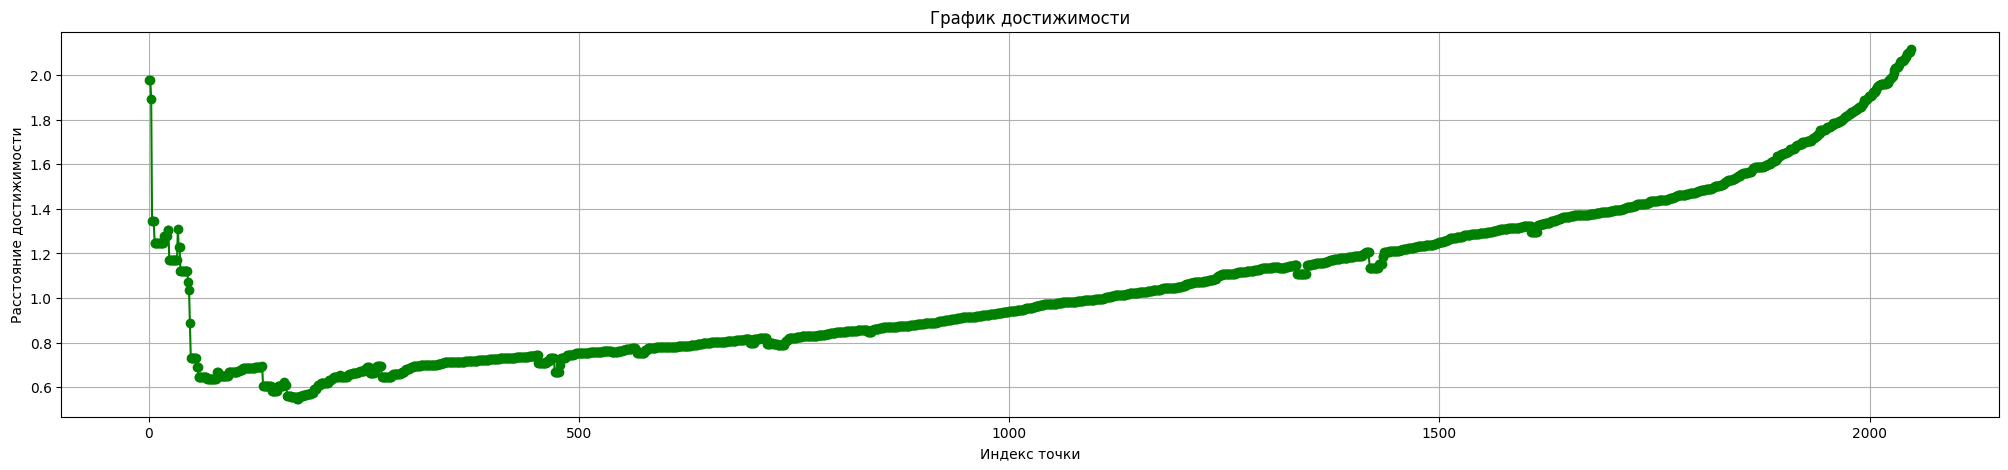

In [10]:
# Устанавливаем параметры для OPTICS
optics_max_eps = 2.12  # Примерное значение max_eps для OPTICS
optics_min_samples = 15  # min_samples для OPTICS

# Кластеризация OPTICS
optics = OPTICS(max_eps=optics_max_eps, min_samples=optics_min_samples)
optics_labels = optics.fit(scaled_data)

# Получаем расстояния достижимости
reachability_distances = optics.reachability_
ordering = optics.ordering_


# Визуализируем график достижимости
plt.figure(figsize=(25, 5))
plt.plot(range(len(reachability_distances)), reachability_distances[ordering], marker='o', linestyle='-', color='g')
plt.title('График достижимости')
plt.xlabel('Индекс точки')
plt.ylabel('Расстояние достижимости')
plt.grid()
plt.show()

График достижимости помогает понять структуру кластеров и их плотность, а также выявить шумовые точки. В рамкках алгоритма OPTICS покказывает тенденцию изменения расстояния до точек от их порядка в данных.

Ось X: На графике по оси X откладываются индексы точек данных, упорядоченные по расстоянию достижимости. Это означает, что точки с меньшими расстояниями находятся ближе друг к другу.

Ось Y: По оси Y откладываются значения расстояний достижимости для каждой точки. Чем меньше значение, тем ближе точка к другим точкам в своем кластере.

Пики указывают на переходы между кластерами или между кластером и шумом. Высокие пики могут указывать на разрыв между плотными областями.

Впадины указывают на области высокой плотности, где точки близки друг к другу. Эти участки соответствуют кластерам.

Шумовые точки обычно имеют большие значения расстояний достижимости и могут быть представлены как отдельные пики или высокие значения на графике.

График позволяет визуализировать кластеры с различной плотностью. Более плотные кластеры будут иметь меньшие расстояния достижимости и более глубокие впадины, в то время как менее плотные кластеры будут иметь более высокие значения.

На данном графике не наблюдается явных разрывов, что подтверждает существование одного большого кластера. Также видны некоторые пики и впадины, выдающие шум.

3.5. Исследуйте работу метода OPTICS с использованием различных метрик ( metric ). Исследуйте результаты кластеризации с использованием не менее 8 различных метрик.

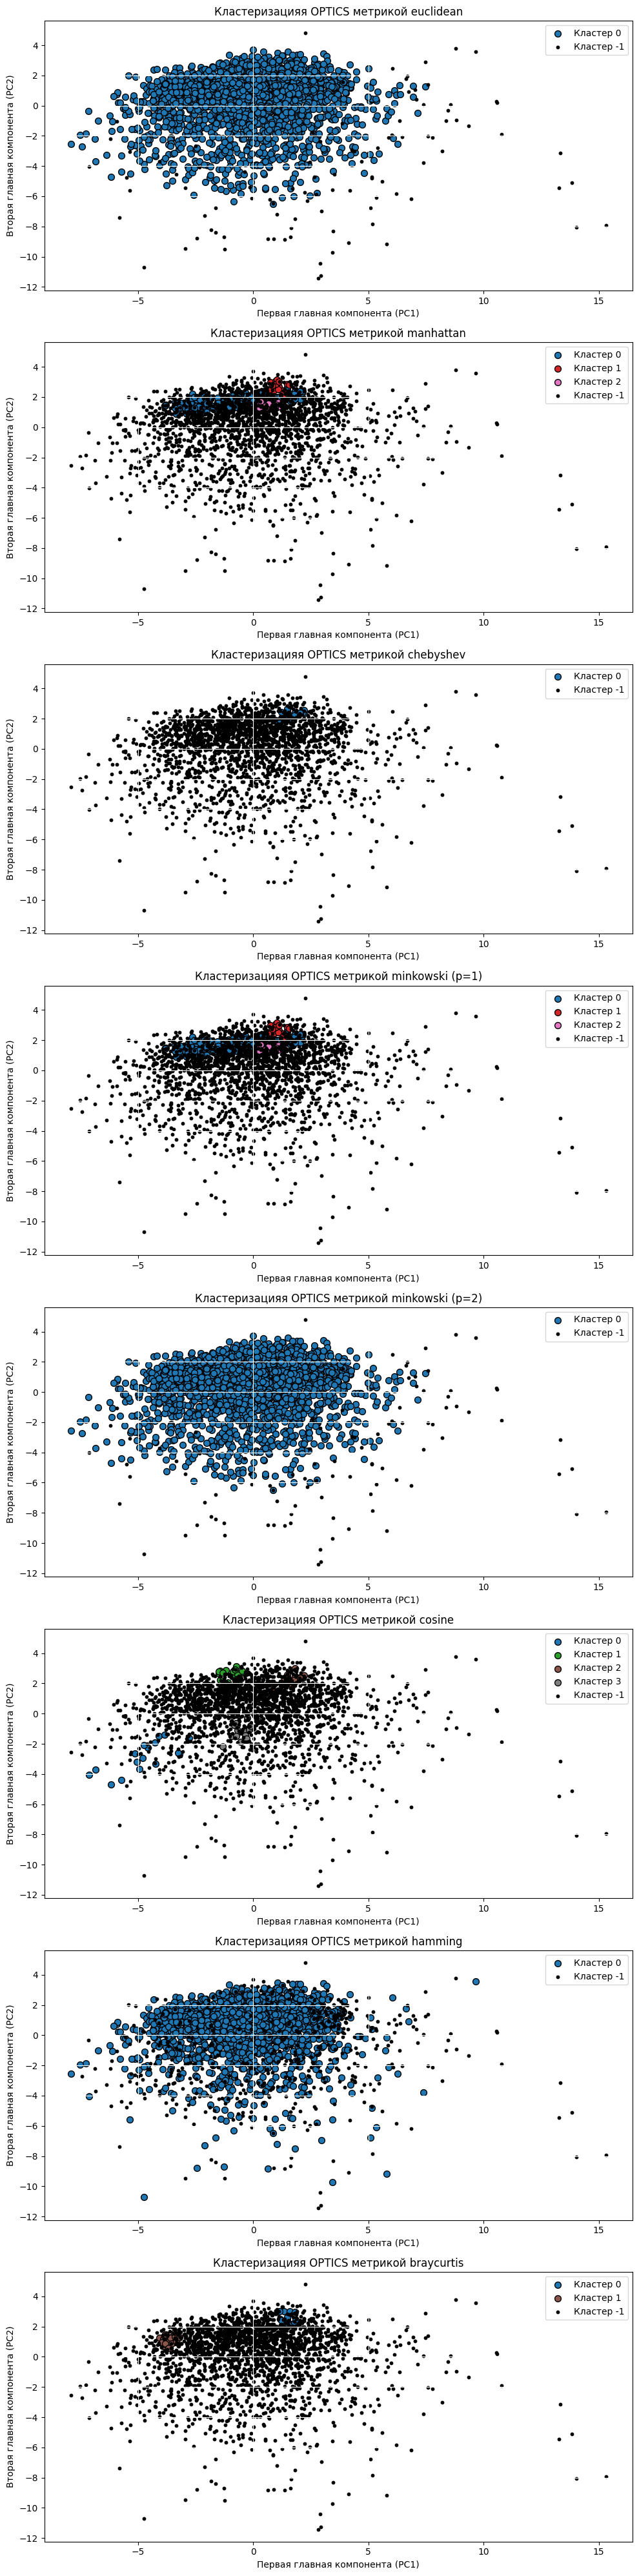

In [11]:
# Параметры OPTICS
optics_max_eps = 2.12
optics_min_samples = 15

# Список метрик для исследования (добавлены новые метрики)
metrics = [
    'euclidean',
    'manhattan',
    'chebyshev',
    'minkowski',
    'cosine',
    'hamming',
    'braycurtis'
]


# Значения p для метрики Минковского
p_values = [1, 2]

# Создание подграфиков для визуализации (по одному в столбик)
fig, axs = plt.subplots(len(metrics) + len(p_values) - 1, 1, figsize=(10, 40))
axs = axs.flatten()

# Индекс для отслеживания подграфиков
index = 0



# Кластеризация и визуализация для каждой метрики
for metric in metrics:
    if metric == 'minkowski':
        for p in p_values:
            optics = OPTICS(min_samples=optics_min_samples, max_eps=optics_max_eps, metric=metric, p=p)
            labels = optics.fit_predict(scaled_data)

            # Визуализация кластеров
            unique_labels = set(labels)
            colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

            for label in unique_labels:
                if label == -1:
                    color = 'k'
                    size = 10
                else:
                    color = colors[label % len(colors)]
                    size = 50

                # Выбор точек для текущего кластера
                cluster_points = pca_data2[labels == label]
                axs[index].scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color=color, label=f'Кластер {label}', edgecolor='k', s=size)

            axs[index].set_title(f'Кластеризацияя OPTICS метрикой {metric} (p={p})')
            axs[index].set_xlabel('Первая главная компонента (PC1)')
            axs[index].set_ylabel('Вторая главная компонента (PC2)')
            axs[index].grid(color='white')
            axs[index].legend()
            index += 1

    else:
        optics = OPTICS(min_samples=optics_min_samples, max_eps=optics_max_eps, metric=metric)
        labels = optics.fit_predict(scaled_data)

        # Визуализация кластеров
        unique_labels = set(labels)
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))



        for label in unique_labels:
            if label == -1:
                color = 'k'
                size = 10
            else:
                color = colors[label % len(colors)]
                size = 50

            # Выбор точек для текущего кластера
            cluster_points = pca_data2[labels == label]
            axs[index].scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color=color, label=f'Кластер {label}', edgecolor='k', s=size)

        axs[index].set_title(f'Кластеризацияя OPTICS метрикой {metric}')
        axs[index].set_xlabel('Первая главная компонента (PC1)')
        axs[index].set_ylabel('Вторая главная компонента (PC2)')
        axs[index].grid(color='white')
        axs[index].legend()
        index += 1


plt.tight_layout()
plt.show()

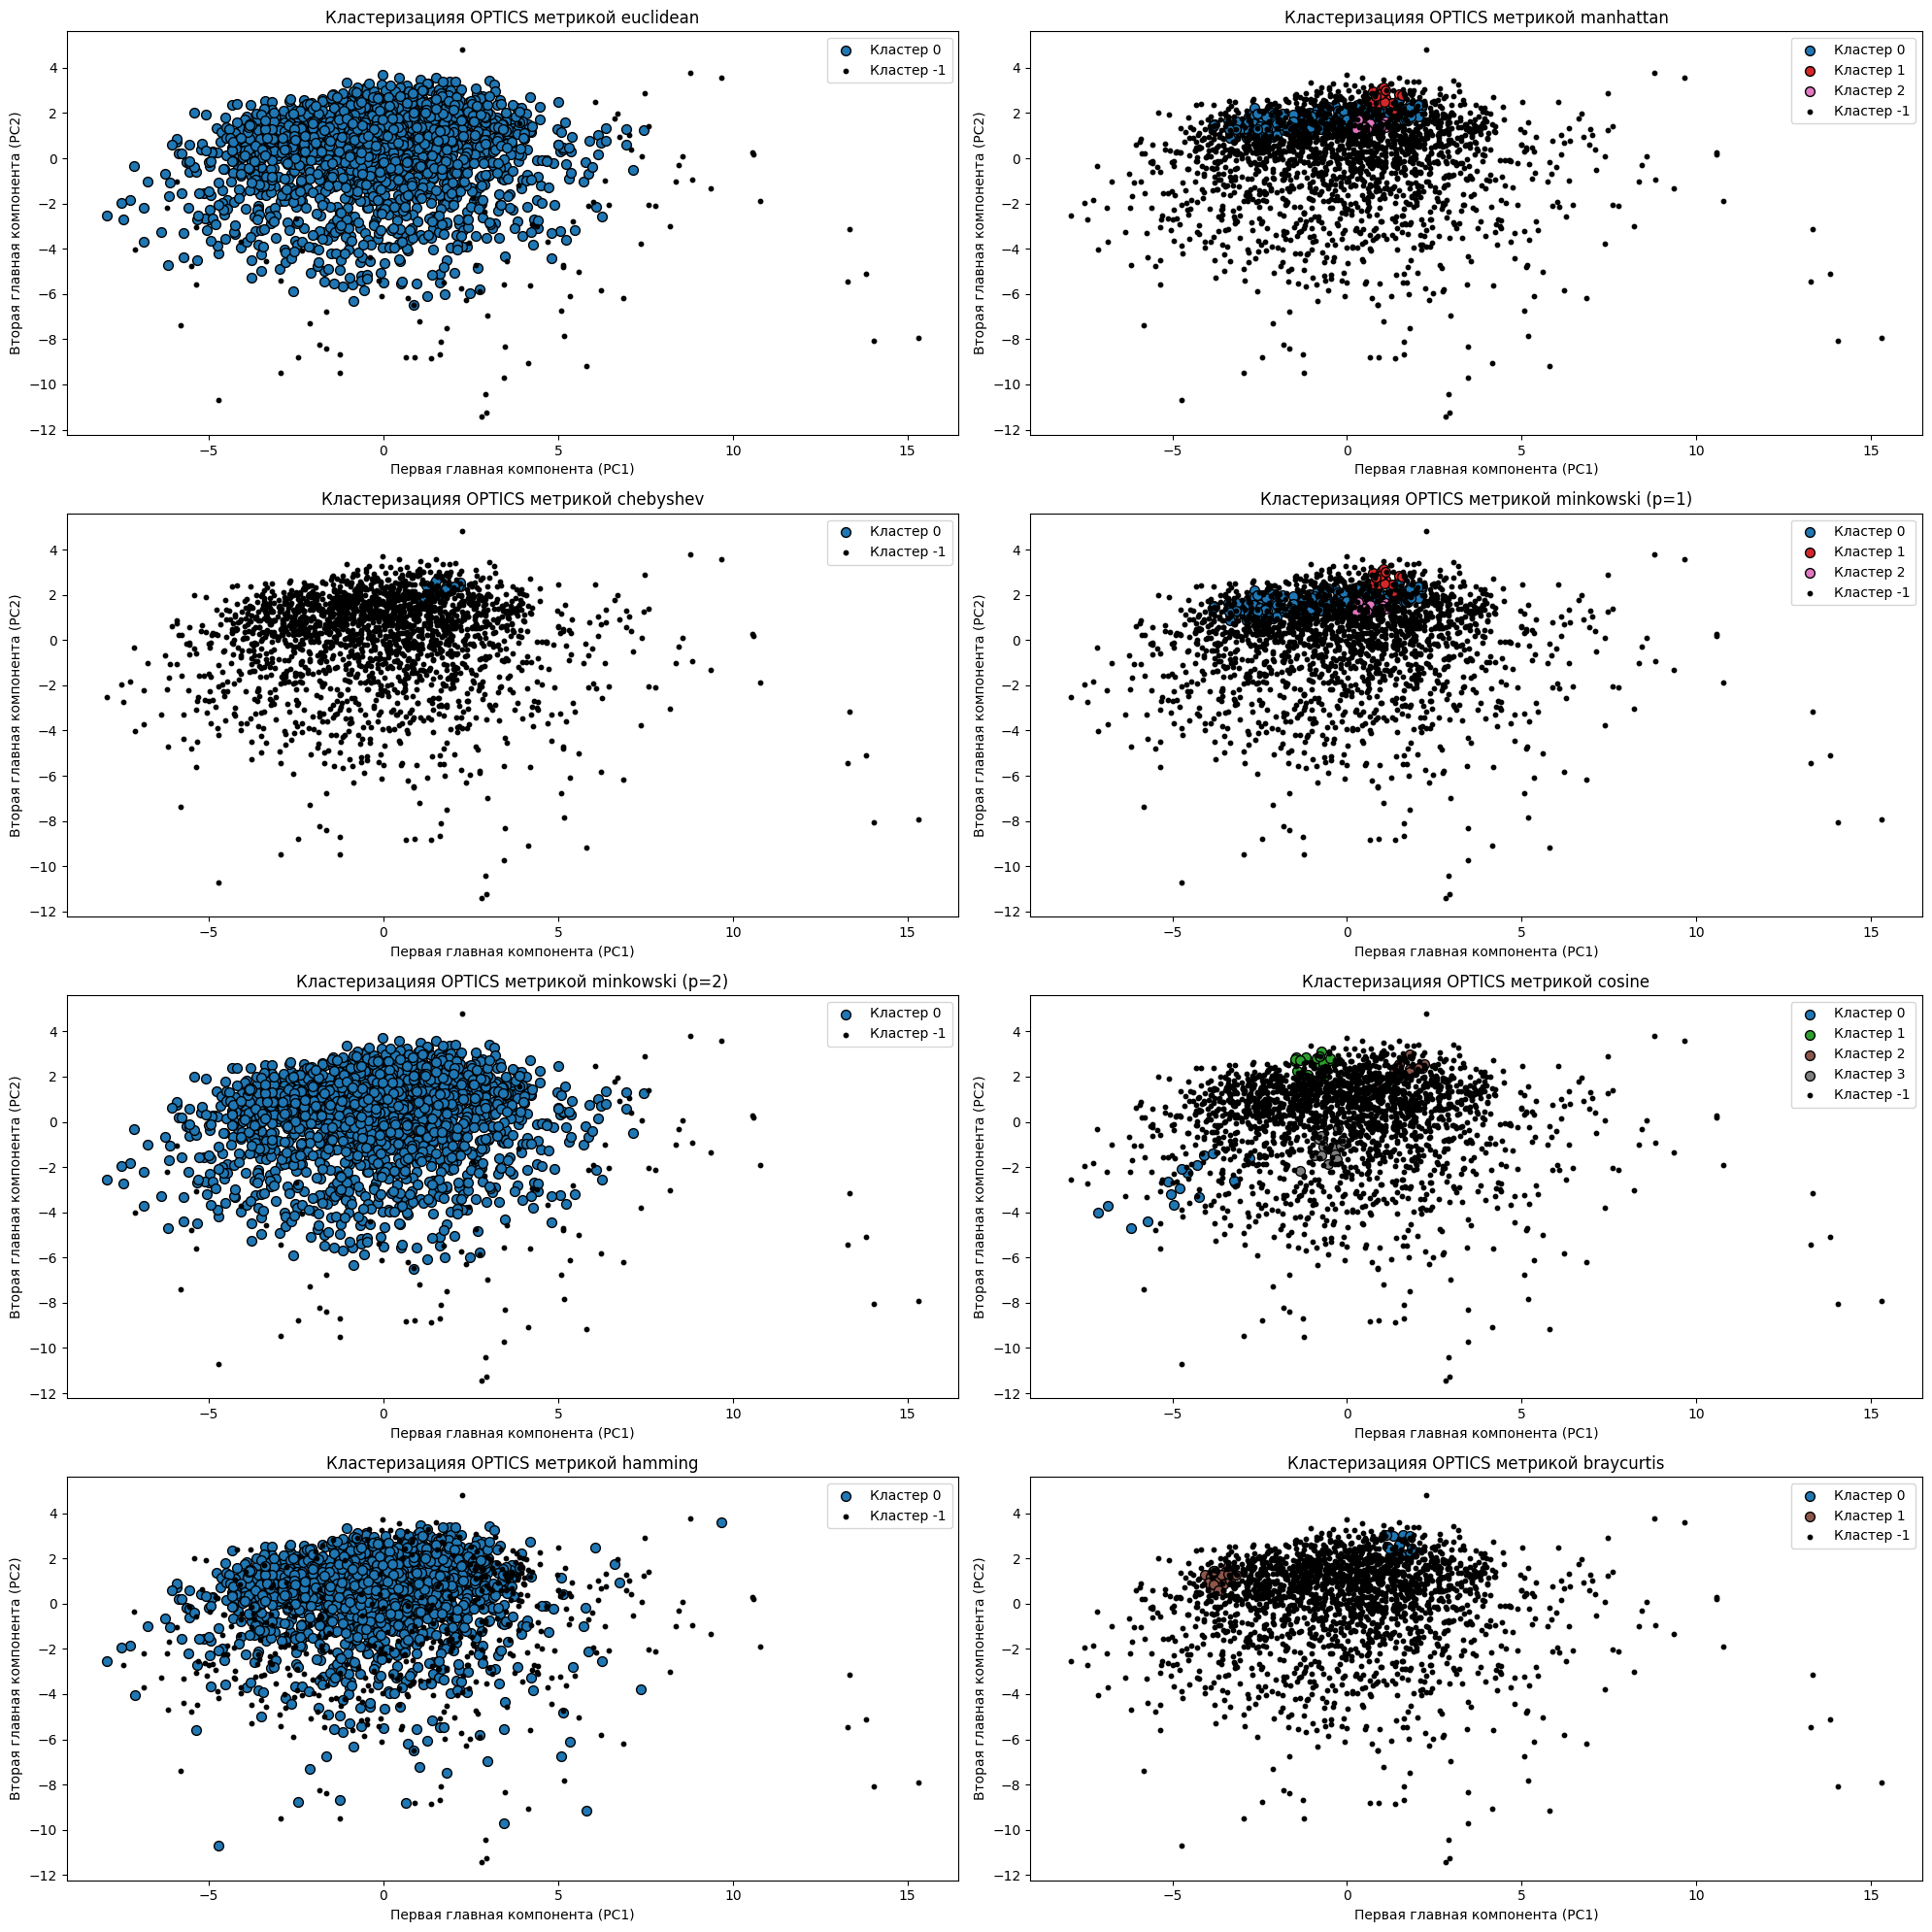

In [22]:
# Параметры OPTICS
optics_max_eps = 2.12
optics_min_samples = 15

# Список метрик для исследования (добавлены новые метрики)
metrics = [
    'euclidean',
    'manhattan',
    'chebyshev',
    'minkowski',
    'cosine',
    'hamming',
    'braycurtis',
]

# Значения p для метрики Минковского
p_values = [1, 2]

# Переменная для хранения количества графиков
figs = int((len(metrics) + len(p_values) - 1) / 2)

# Создание подграфиков для визуализации (по одному в столбик)
fig, axs = plt.subplots(figs, 2, figsize=(20, 20))
axs = axs.flatten()

# Индекс для отслеживания подграфиков
index = 0

# Кластеризация и визуализация для каждой метрики
for metric in metrics:
    if metric == 'minkowski':
        for p in p_values:
            optics = OPTICS(min_samples=optics_min_samples, max_eps=optics_max_eps, metric=metric, p=p)
            labels = optics.fit_predict(scaled_data)

            # Визуализация кластеров
            unique_labels = set(labels)
            colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

            for label in unique_labels:
                if label == -1:
                    color = 'k'
                    size = 10
                else:
                    color = colors[label % len(colors)]
                    size = 50

                # Выбор точек для текущего кластера
                cluster_points = pca_data2[labels == label]
                axs[index].scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color=color, label=f'Кластер {label}', edgecolor='k', s=size)

            axs[index].set_title(f'Кластеризацияя OPTICS метрикой {metric} (p={p})')
            axs[index].set_xlabel('Первая главная компонента (PC1)')
            axs[index].set_ylabel('Вторая главная компонента (PC2)')
            axs[index].legend()
            index += 1

    else:
        optics = OPTICS(min_samples=optics_min_samples, max_eps=optics_max_eps, metric=metric)
        labels = optics.fit_predict(scaled_data)

        # Визуализация кластеров
        unique_labels = set(labels)
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

        for label in unique_labels:
            if label == -1:
                color = 'k'
                size = 10
            else:
                color = colors[label % len(colors)]
                size = 50

            # Выбор точек для текущего кластера
            cluster_points = pca_data2[labels == label]
            axs[index].scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], color=color, label=f'Кластер {label}', edgecolor='k', s=size)

        axs[index].set_title(f'Кластеризацияя OPTICS метрикой {metric}')
        axs[index].set_xlabel('Первая главная компонента (PC1)')
        axs[index].set_ylabel('Вторая главная компонента (PC2)')
        axs[index].legend()
        index += 1

plt.tight_layout()
plt.show()